In [182]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [183]:
df = pd.read_json("exps.jsonl", lines=True)
print(len(df))
df.head()

540


,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,...,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,metrics.3hops.exact_match,metrics.3hops.f1,metrics.4hops.exact_match,metrics.4hops.f1,params.qa.n_sc,params.qa.technique
0,5bf0f42a3be03329be9d148689ff94f29ae6eebe,irate-cons,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.1,cot/original.txt,cq.txt,semi/cot-original.json,...,0.603333,0.703349,0.71,0.818810,0.58,0.670333,0.52,0.620905,1,COT
1,d2c8585fee2c6e986a2e02f1cddc2f647afe5798,eager-toga,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.1,ccot/original.txt,cq.txt,semi/ccot-original.json,...,0.640000,0.748900,0.71,0.821185,0.60,0.698032,0.61,0.727485,1,CCOT
2,cce419f025b20f023080ef7d46cf39a9f713d236,barky-buoy,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.1,cot/format-thought.txt,cq.txt,semi/cot.json,...,0.626667,0.728144,0.70,0.809113,0.59,0.673722,0.59,0.701596,1,COT
3,344ae1feba339068949157dfbfe5475880fde429,gouty-mate,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.1,cot/format-thought.txt,cq.txt,semi/cot.json,...,0.636667,0.736496,0.72,0.814165,0.57,0.671056,0.62,0.724267,1,COT
4,bd59c4d52f4609626d0e126ae6053e25cf333ec3,lippy-food,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.1,ccot/format-thought.txt,cq.txt,semi/ccot.json,...,0.653333,0.754578,0.71,0.820208,0.62,0.714222,0.63,0.729303,1,CCOT


In [184]:
param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
df.drop(
    columns=[
        "id",
        "params.dataset.path",
        "params.dataset.name",
        "params.dataset.split",
        "params.qa.model",
    ],
    inplace=True,
)

In [185]:
target_param_cols = [
    "params.qa.technique",
    "params.qa.system_prompt",
    "params.qa.user_prompt_template",
    "params.qa.few_shot_examples",
    "params.qa.n_shot",
    "params.qa.n_sc",
    "params.qa.temperature",
]
df = df.sort_values(target_param_cols + ["params.run"])
# df = df[df['params.qa.n_sc']==1].copy()
df.reset_index(drop=True, inplace=True)
df.head()

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.run,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,metrics.3hops.exact_match,metrics.3hops.f1,metrics.4hops.exact_match,metrics.4hops.f1,params.qa.n_sc,params.qa.technique
0,minus-scab,0.1,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,1,0.646667,0.745449,0.70,0.806764,0.60,0.694222,0.64,0.735360,1,CCOT
1,lippy-food,0.1,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,2,0.653333,0.754578,0.71,0.820208,0.62,0.714222,0.63,0.729303,1,CCOT
2,snide-iglu,0.1,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,3,0.656667,0.747483,0.71,0.813859,0.61,0.693722,0.65,0.734867,1,CCOT
3,lowse-tics,0.5,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,1,0.643333,0.745538,0.70,0.809653,0.61,0.696294,0.62,0.730667,1,CCOT
4,lippy-lame,0.5,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,2,0.623333,0.729068,0.71,0.815859,0.56,0.673103,0.60,0.698241,1,CCOT


In [186]:
run_counts = df.groupby(target_param_cols)["params.run"].aggregate(tuple).reset_index()
mask = run_counts["params.run"].map(len) != 3
run_counts.loc[mask]

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.qa.temperature,params.run
34,CCOT-SC(10),ccot/format-thought.txt,cq.txt,semi/ccot.json,0,10,0.7,"(1, 3)"
37,CCOT-SC(10),ccot/format-thought.txt,cq.txt,semi/ccot.json,1,10,0.7,"(1,)"
39,CCOT-SC(10),ccot/format-thought.txt,cq.txt,semi/ccot.json,2,10,0.5,"(1,)"
40,CCOT-SC(10),ccot/format-thought.txt,cq.txt,semi/ccot.json,3,10,0.1,"(2,)"
41,CCOT-SC(10),ccot/format-thought.txt,cq.txt,semi/ccot.json,3,10,0.5,"(2,)"
42,CCOT-SC(10),ccot/format-thought.txt,cq.txt,semi/ccot.json,3,10,0.7,"(2,)"
45,CCOT-SC(10),ccot/original.txt,cq.txt,semi/ccot-original.json,0,10,0.7,"(1, 3)"
47,CCOT-SC(10),ccot/original.txt,cq.txt,semi/ccot-original.json,1,10,0.5,"(2, 3)"
48,CCOT-SC(10),ccot/original.txt,cq.txt,semi/ccot-original.json,1,10,0.7,"(1, 3)"
51,CCOT-SC(10),ccot/original.txt,cq.txt,semi/ccot-original.json,2,10,0.7,"(1,)"


In [187]:
def remove_ext(filename):
    return filename.split(".", 1)[0]

df["params.qa.system_prompt"] = df["params.qa.system_prompt"].map(remove_ext)
df["params.qa.user_prompt_template"] = df["params.qa.user_prompt_template"].map(remove_ext)
df["params.qa.few_shot_examples"] = df["params.qa.few_shot_examples"].map(remove_ext)

In [188]:
df['params.qa.system_prompt'].unique()

array(['ccot/format-thought', 'ccot/original', 'cok/adapted',
       'cok/original', 'cot/format-thought', 'cot/original',
       'cte/format-triplets-few', 'direct/format-few'], dtype=object)

In [189]:
avg_df = df.groupby(target_param_cols)[metric_cols].max().reset_index()
avg_df.head()

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,metrics.3hops.exact_match,metrics.3hops.f1,metrics.4hops.exact_match,metrics.4hops.f1
0,CCOT,ccot/format-thought,cq,semi/ccot,0,1,0.1,0.656667,0.754578,0.71,0.820208,0.62,0.714222,0.65,0.735360
1,CCOT,ccot/format-thought,cq,semi/ccot,0,1,0.5,0.643333,0.745538,0.71,0.820653,0.61,0.696294,0.62,0.730667
2,CCOT,ccot/format-thought,cq,semi/ccot,0,1,0.7,0.630000,0.728313,0.73,0.817097,0.59,0.678119,0.60,0.717061
3,CCOT,ccot/format-thought,cq,semi/ccot,0,1,1.0,0.623333,0.727132,0.69,0.795071,0.58,0.689175,0.61,0.711001
4,CCOT,ccot/format-thought,cq,semi/ccot,1,1,0.1,0.650000,0.742611,0.74,0.831595,0.64,0.723397,0.58,0.684788


In [190]:
# find the rows with max f1 score for each technique group
max_f1_rows = avg_df.groupby('params.qa.technique')["metrics.f1"].idxmax()
best_df = avg_df.loc[max_f1_rows, target_param_cols + metric_cols].sort_values('metrics.f1', ascending=False)
best_df

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,metrics.3hops.exact_match,metrics.3hops.f1,metrics.4hops.exact_match,metrics.4hops.f1
177,CTE-SC(10),cte/format-triplets-few,cq,semi/cte,2,10,0.7,0.710000,0.800872,0.79,0.862770,0.70,0.774460,0.64,0.765385
162,CTE,cte/format-triplets-few,cq,semi/cte,2,1,0.1,0.723333,0.798023,0.81,0.876781,0.70,0.758703,0.66,0.764242
91,COK-SC(10),cok/adapted,cq,semi/cok,2,10,0.7,0.710000,0.787980,0.79,0.846056,0.71,0.770937,0.65,0.746948
114,COT,cot/format-thought,cq,semi/cot,3,1,0.5,0.686667,0.784944,0.74,0.838990,0.66,0.755603,0.66,0.760238
67,COK,cok/adapted,cq,semi/cok,3,1,0.1,0.696667,0.784877,0.77,0.843179,0.68,0.750709,0.64,0.760742
203,DIRECT-SC(10),direct/format-few,cq,semi/direct,2,10,0.5,0.686667,0.782528,0.77,0.857056,0.67,0.742770,0.65,0.760774
42,CCOT-SC(10),ccot/format-thought,cq,semi/ccot,3,10,0.7,0.680000,0.781979,0.72,0.831953,0.67,0.747603,0.65,0.766381
194,DIRECT,direct/format-few,cq,semi/direct,3,1,0.5,0.683333,0.781744,0.75,0.857072,0.68,0.748763,0.65,0.757391
143,COT-SC(10),cot/format-thought,cq,semi/cot,3,10,0.7,0.663333,0.779488,0.72,0.841151,0.64,0.751794,0.63,0.745519
9,CCOT,ccot/format-thought,cq,semi/ccot,2,1,0.5,0.683333,0.779213,0.74,0.813738,0.69,0.761095,0.64,0.773281


## Visualizations

In [191]:
def prepare_data(dataf):
    # Simplify column names for use in formula
    dataf = dataf[target_param_cols + ['params.run'] + metric_cols[:2]].rename(
        columns={
            col: col.replace("params.qa.", "").replace("params.", "").replace("metrics.", "")
            for col in dataf.columns
        }
    )

    # Combine prompts into a single column for simplicity
    dataf["prompt"] = (
        dataf["system_prompt"]
        + " | "
        + dataf["user_prompt_template"]
        + " | "
        + dataf["n_shot"].map(str)
    )

    return dataf


In [192]:
def plot_variance(dataf, x='temperature', y='f1', hue='prompt', technique=None, figsize=(12, 8), legend='auto', legend_loc='lower left'):  
    if technique:
        dataf = dataf[dataf['technique'] == technique]
    plt.figure(figsize=figsize)
    sns.lineplot(x=x, y=y, hue=hue, data=dataf, linewidth=2.5, legend=legend)
    plt.xlabel(x.title())
    plt.ylabel(y.title())
    if legend:
        plt.legend(loc=legend_loc)
    plt.tight_layout()
    plt.show()

In [193]:
def plot_variance_grid(dataf, x='temperature', y='f1', hue='prompt', figsize=(6, 4), legend='auto', legend_loc='lower left'):
    techniques = dataf['technique'].unique()
    n = len(techniques)
    n_cols = 2
    n_rows = (n + 1) // n_cols  # Calculate the number of rows needed for nx2 grid
    figsize = (figsize[0] * n_cols, figsize[1] * n_rows)  # Adjust the figure size based on the number of rows
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, technique in enumerate(techniques):
        ax = axes[i]
        subset = dataf[dataf['technique'] == technique]
        sns.lineplot(x=x, y=y, hue=hue, data=subset, linewidth=2.5, legend=False, ax=ax)
        ax.set_title(technique)
        ax.set_xlabel(x.title())
        ax.set_ylabel(y.title())

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [194]:
prepared_df = prepare_data(df)
zero_shot_mask = prepared_df["n_shot"] == 0
prepared_df

,technique,system_prompt,user_prompt_template,few_shot_examples,n_shot,n_sc,temperature,run,exact_match,f1,prompt
0,CCOT,ccot/format-thought,cq,semi/ccot,0,1,0.1,1,0.646667,0.745449,ccot/format-thought | cq | 0
1,CCOT,ccot/format-thought,cq,semi/ccot,0,1,0.1,2,0.653333,0.754578,ccot/format-thought | cq | 0
2,CCOT,ccot/format-thought,cq,semi/ccot,0,1,0.1,3,0.656667,0.747483,ccot/format-thought | cq | 0
3,CCOT,ccot/format-thought,cq,semi/ccot,0,1,0.5,1,0.643333,0.745538,ccot/format-thought | cq | 0
4,CCOT,ccot/format-thought,cq,semi/ccot,0,1,0.5,2,0.623333,0.729068,ccot/format-thought | cq | 0
...,...,...,...,...,...,...,...,...,...,...,...
535,DIRECT-SC(10),direct/format-few,cq,semi/direct,3,10,0.1,3,0.673333,0.773961,direct/format-few | cq | 3
536,DIRECT-SC(10),direct/format-few,cq,semi/direct,3,10,0.5,1,0.670000,0.754571,direct/format-few | cq | 3
537,DIRECT-SC(10),direct/format-few,cq,semi/direct,3,10,0.5,2,0.666667,0.766964,direct/format-few | cq | 3
538,DIRECT-SC(10),direct/format-few,cq,semi/direct,3,10,0.5,3,0.640000,0.717499,direct/format-few | cq | 3


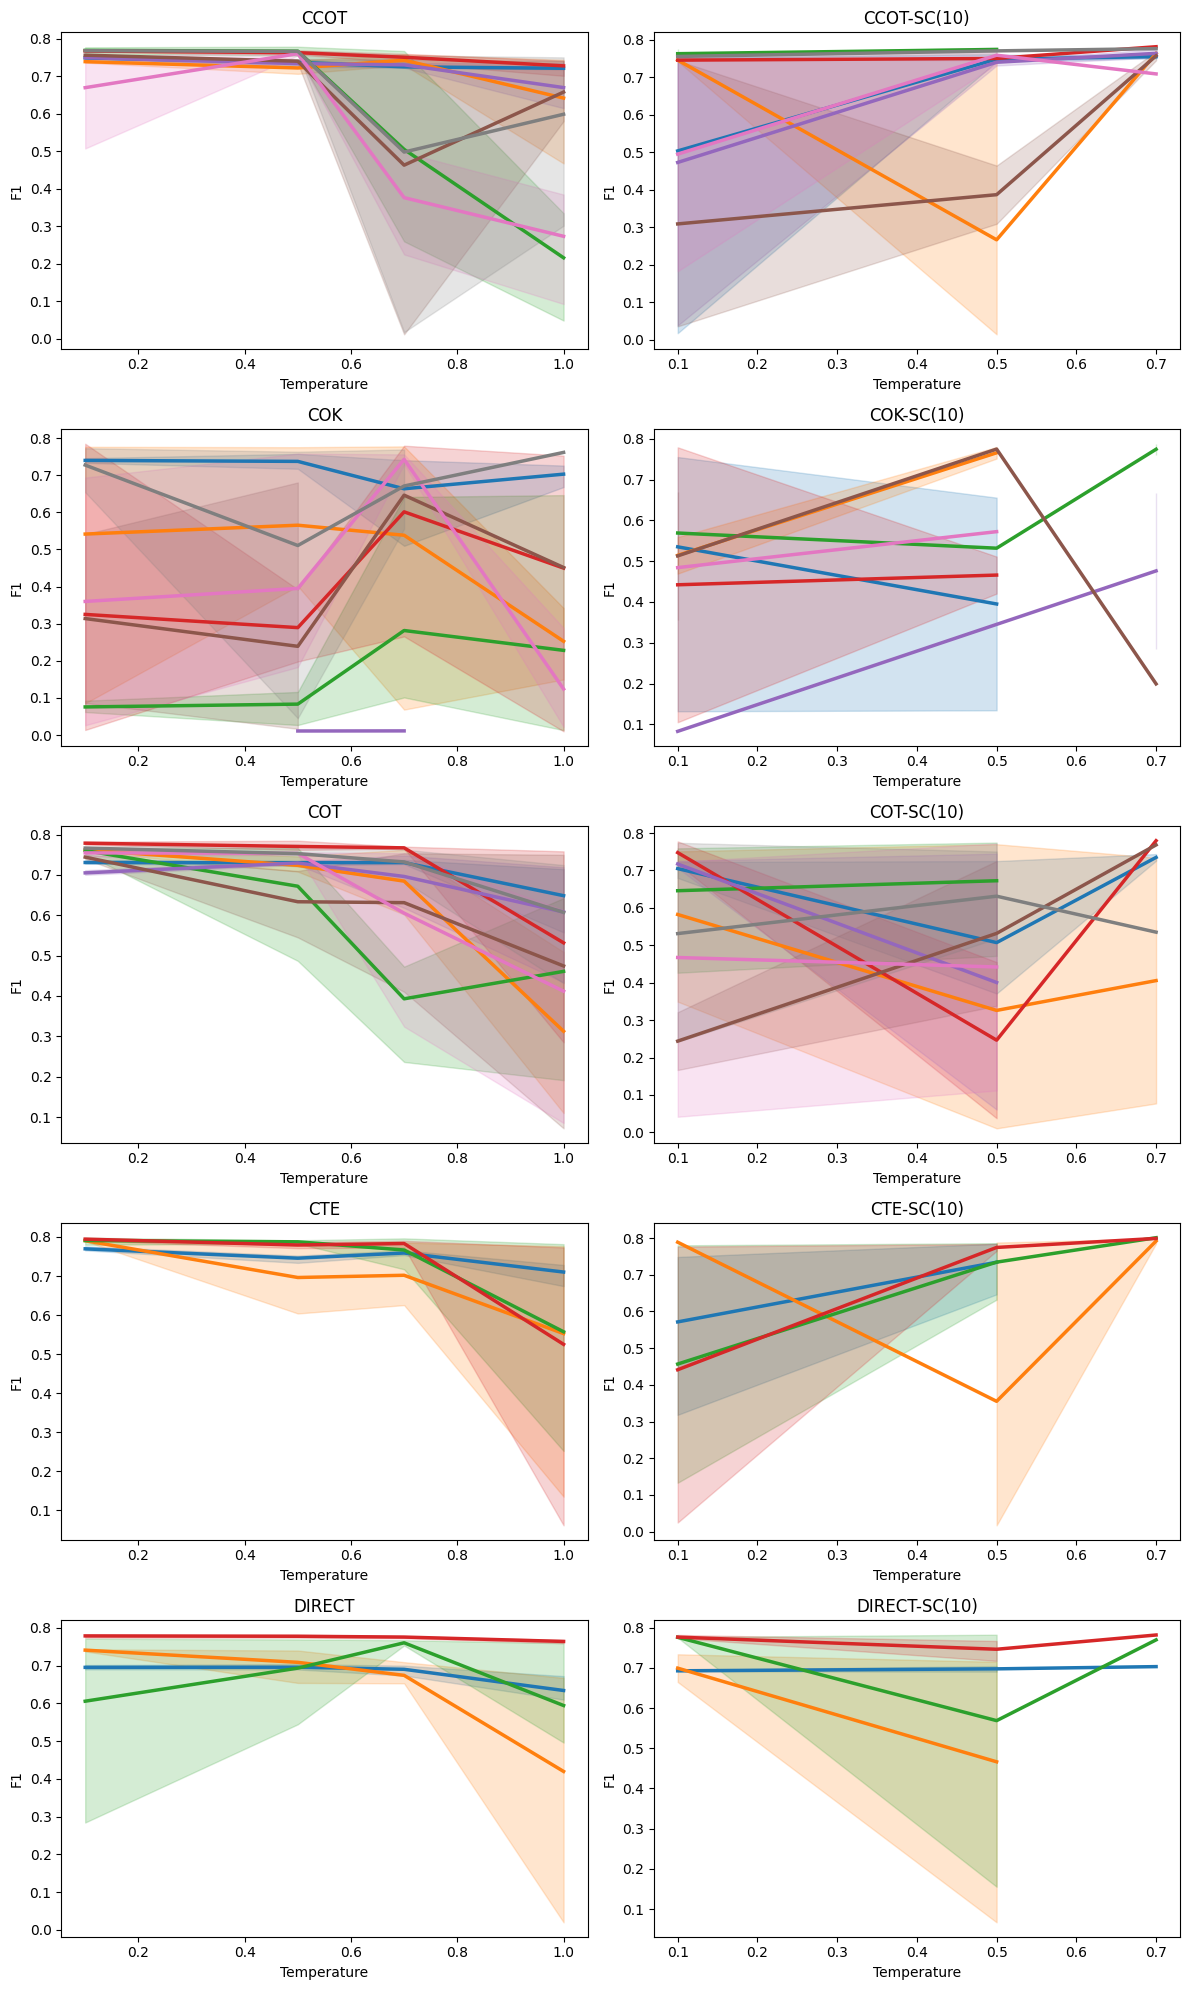

In [195]:
plot_variance_grid(prepared_df, x='temperature', y='f1', hue='prompt', legend_loc='upper left')

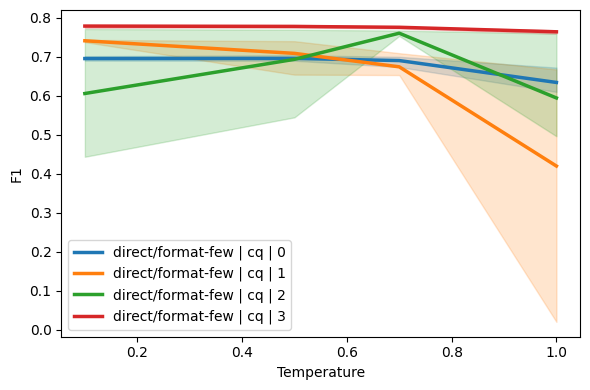

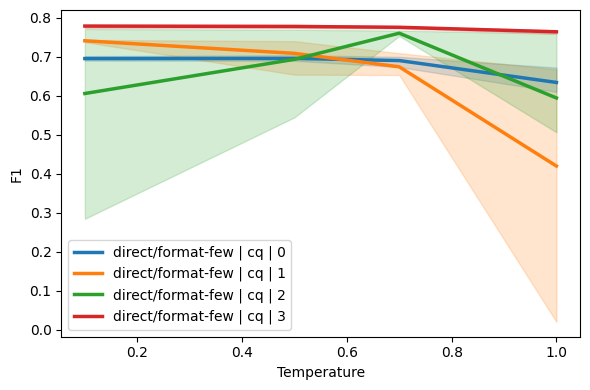

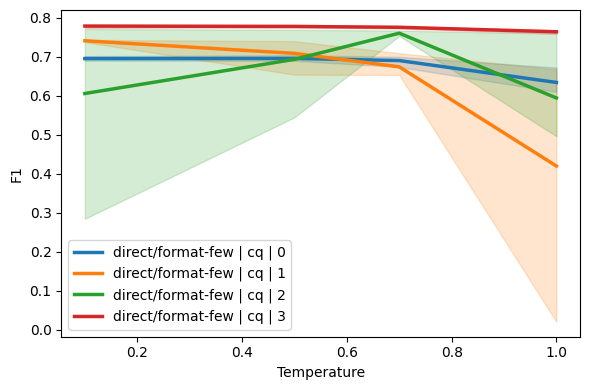

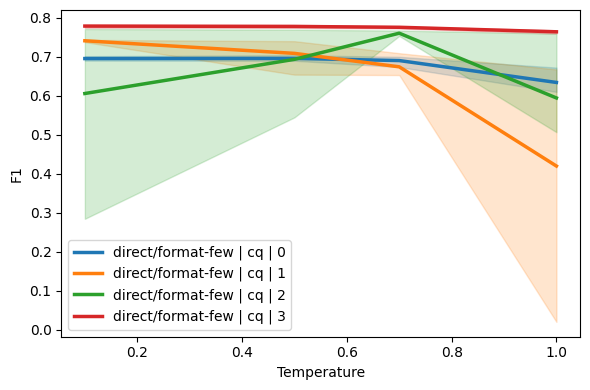

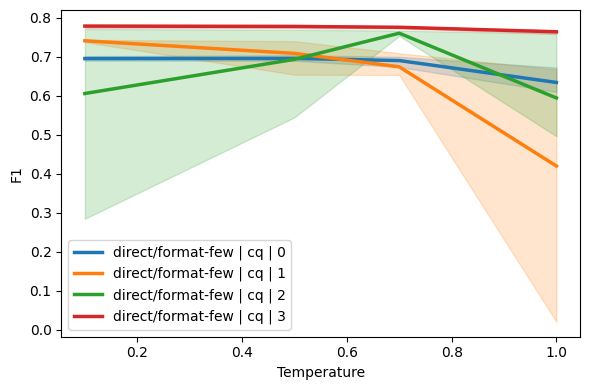

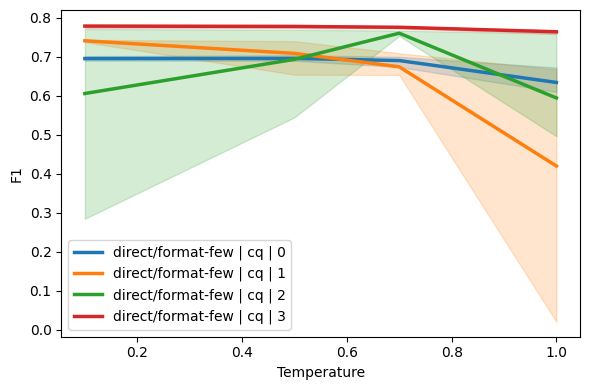

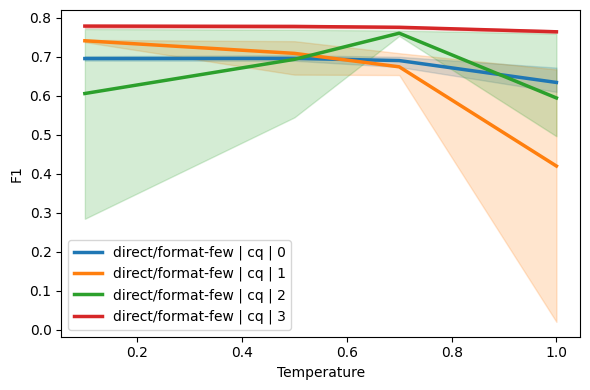

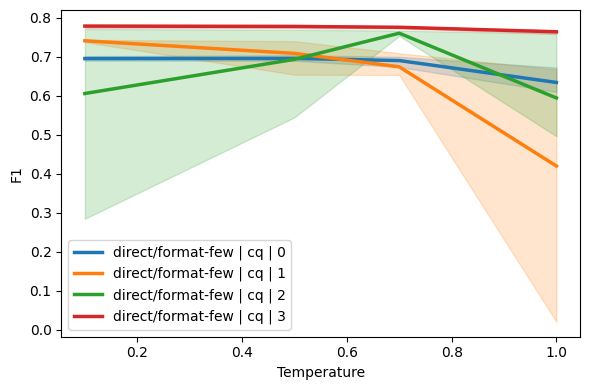

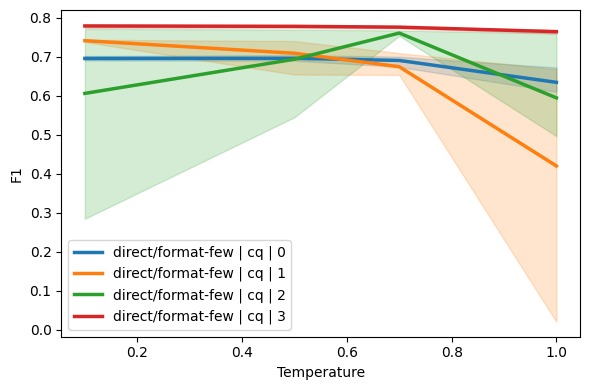

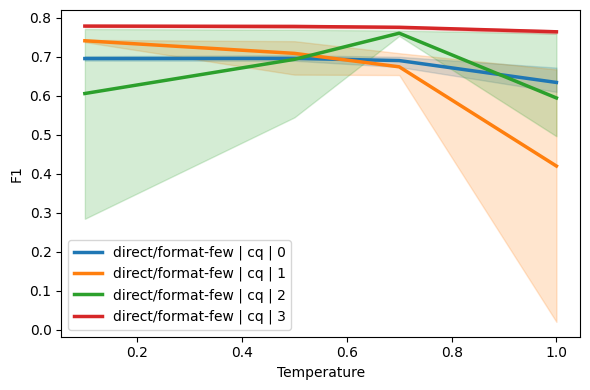

In [196]:
for technique in prepared_df['technique'].unique():
    plot_variance(prepared_df, technique='DIRECT', legend='brief', figsize=(6, 4))

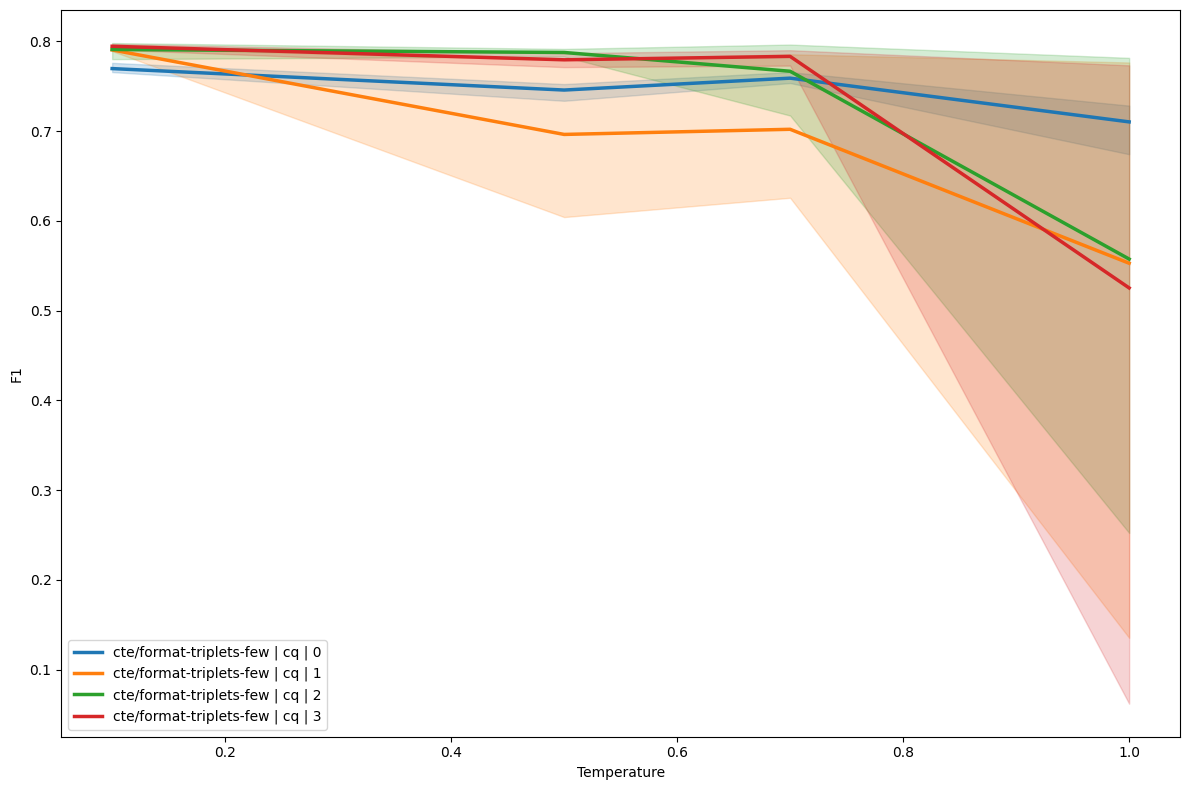

In [197]:
plot_variance(prepared_df, technique='CTE', legend='brief')

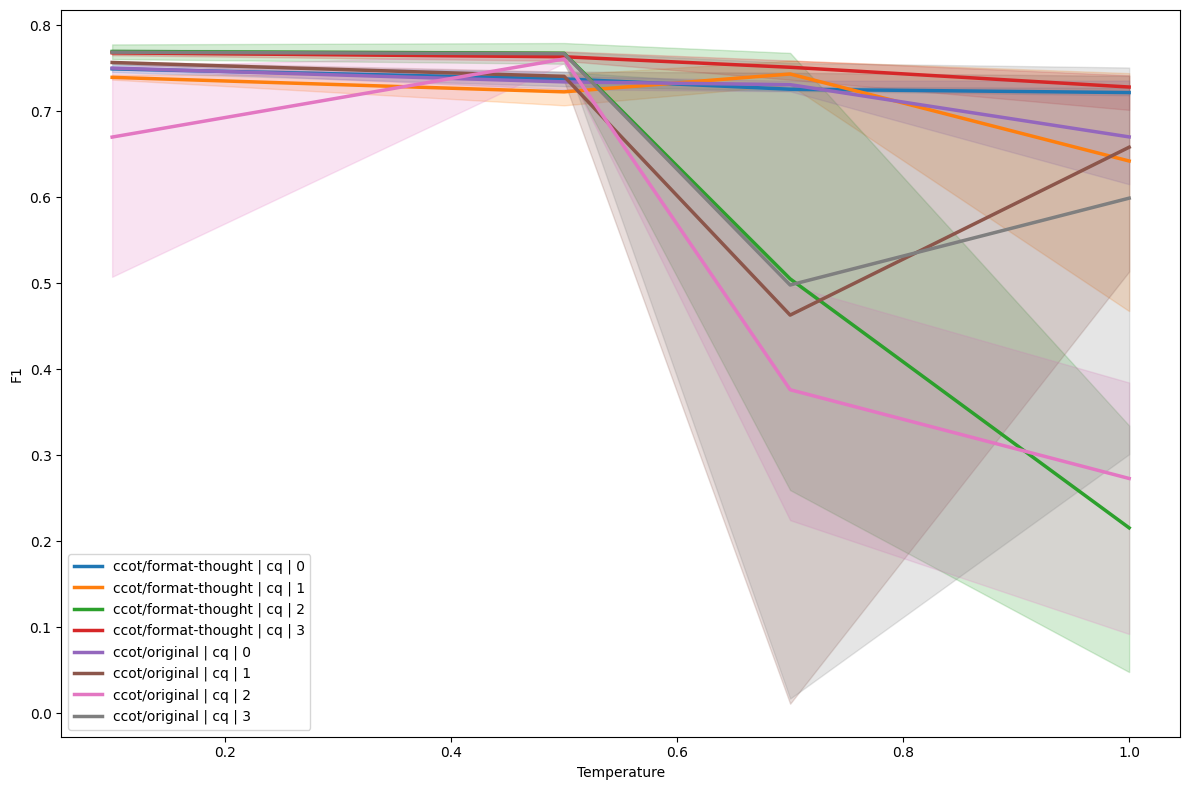

In [198]:
plot_variance(prepared_df, technique='CCOT', legend='brief')

In [199]:
best_df['params.run'] = 0
best_prompts = prepare_data(best_df).prompt.values.tolist()
_data = prepared_df.copy()
prompt_mask = _data['prompt'].isin(best_prompts)
best_prepared_df = _data.loc[prompt_mask]
best_prepared_df

,technique,system_prompt,user_prompt_template,few_shot_examples,n_shot,n_sc,temperature,run,exact_match,f1,prompt
24,CCOT,ccot/format-thought,cq,semi/ccot,2,1,0.1,1,0.683333,0.777606,ccot/format-thought | cq | 2
25,CCOT,ccot/format-thought,cq,semi/ccot,2,1,0.1,2,0.666667,0.760572,ccot/format-thought | cq | 2
26,CCOT,ccot/format-thought,cq,semi/ccot,2,1,0.1,3,0.680000,0.770064,ccot/format-thought | cq | 2
27,CCOT,ccot/format-thought,cq,semi/ccot,2,1,0.5,1,0.683333,0.779213,ccot/format-thought | cq | 2
28,CCOT,ccot/format-thought,cq,semi/ccot,2,1,0.5,2,0.650000,0.755140,ccot/format-thought | cq | 2
...,...,...,...,...,...,...,...,...,...,...,...
535,DIRECT-SC(10),direct/format-few,cq,semi/direct,3,10,0.1,3,0.673333,0.773961,direct/format-few | cq | 3
536,DIRECT-SC(10),direct/format-few,cq,semi/direct,3,10,0.5,1,0.670000,0.754571,direct/format-few | cq | 3
537,DIRECT-SC(10),direct/format-few,cq,semi/direct,3,10,0.5,2,0.666667,0.766964,direct/format-few | cq | 3
538,DIRECT-SC(10),direct/format-few,cq,semi/direct,3,10,0.5,3,0.640000,0.717499,direct/format-few | cq | 3


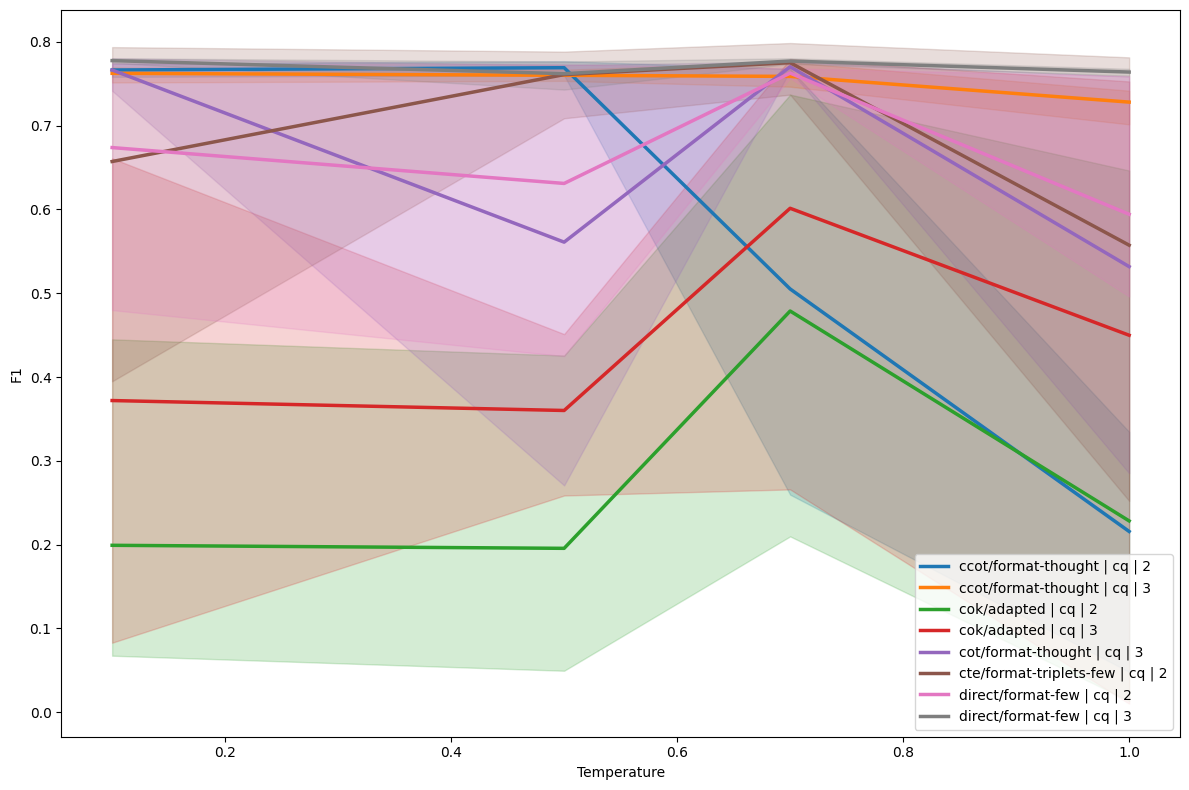

In [200]:
plot_variance(best_prepared_df, figsize=(12, 8), legend_loc='lower right')

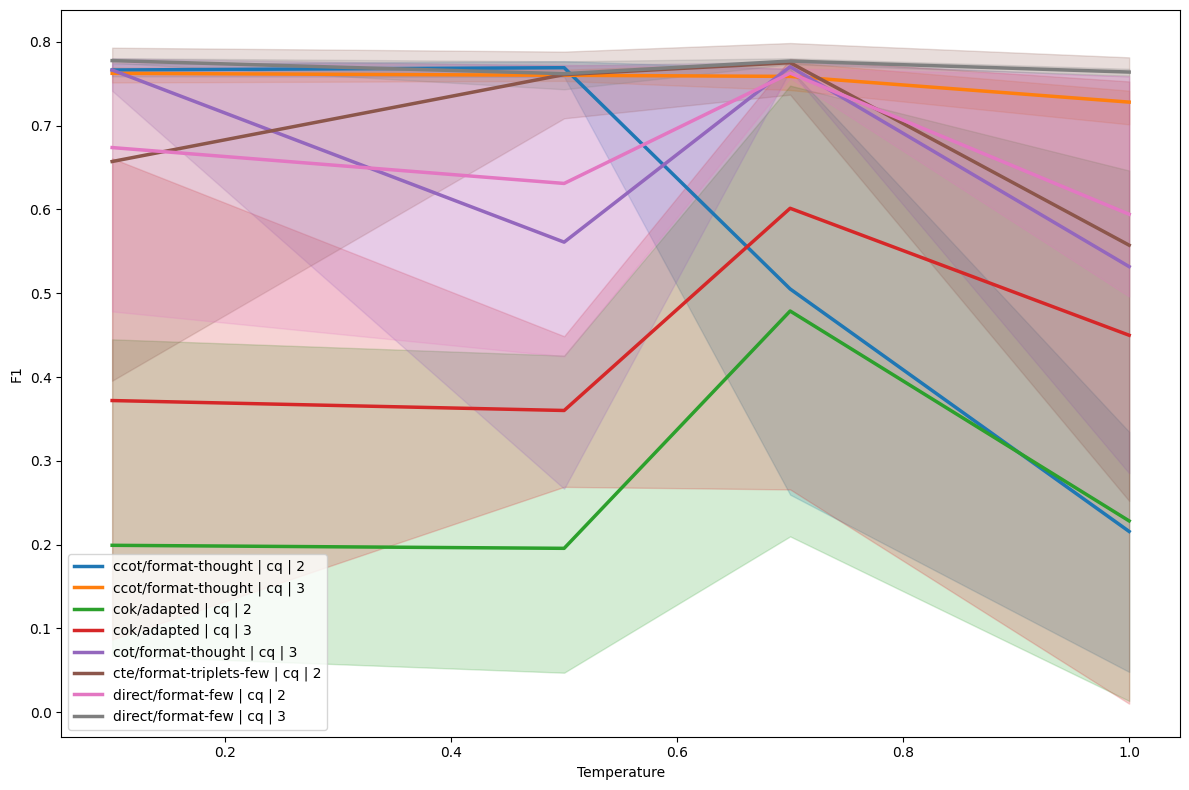

In [201]:
plot_variance(best_prepared_df, figsize=(12, 8), legend_loc='lower left')

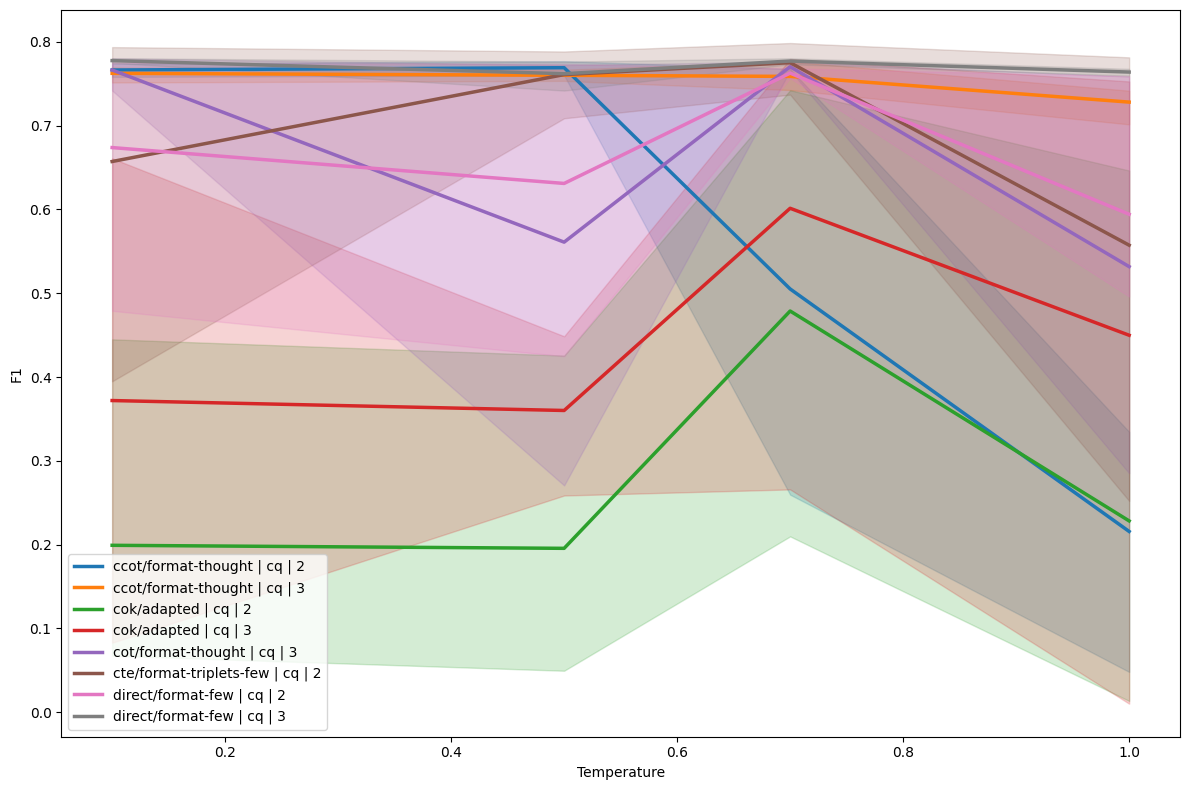

In [202]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], figsize=(12, 8), legend_loc='lower left')

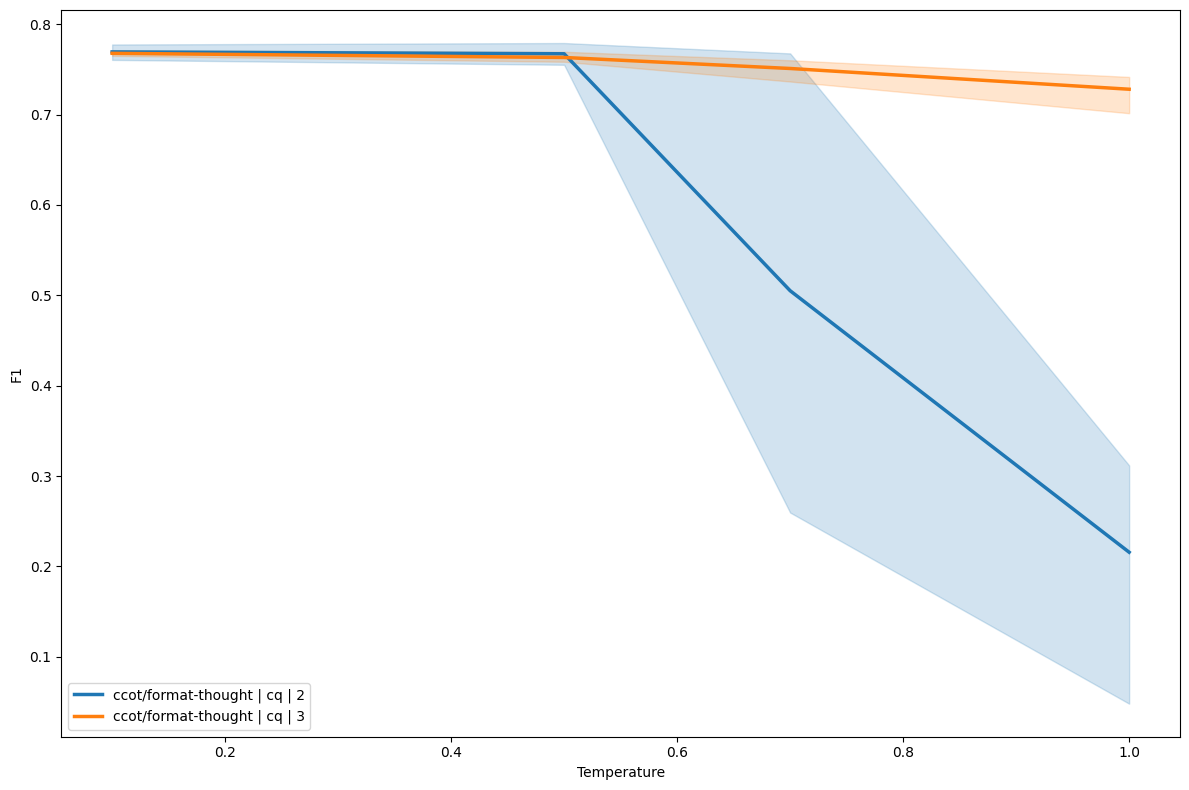

In [203]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], technique='CCOT', figsize=(12, 8), legend_loc='lower left')

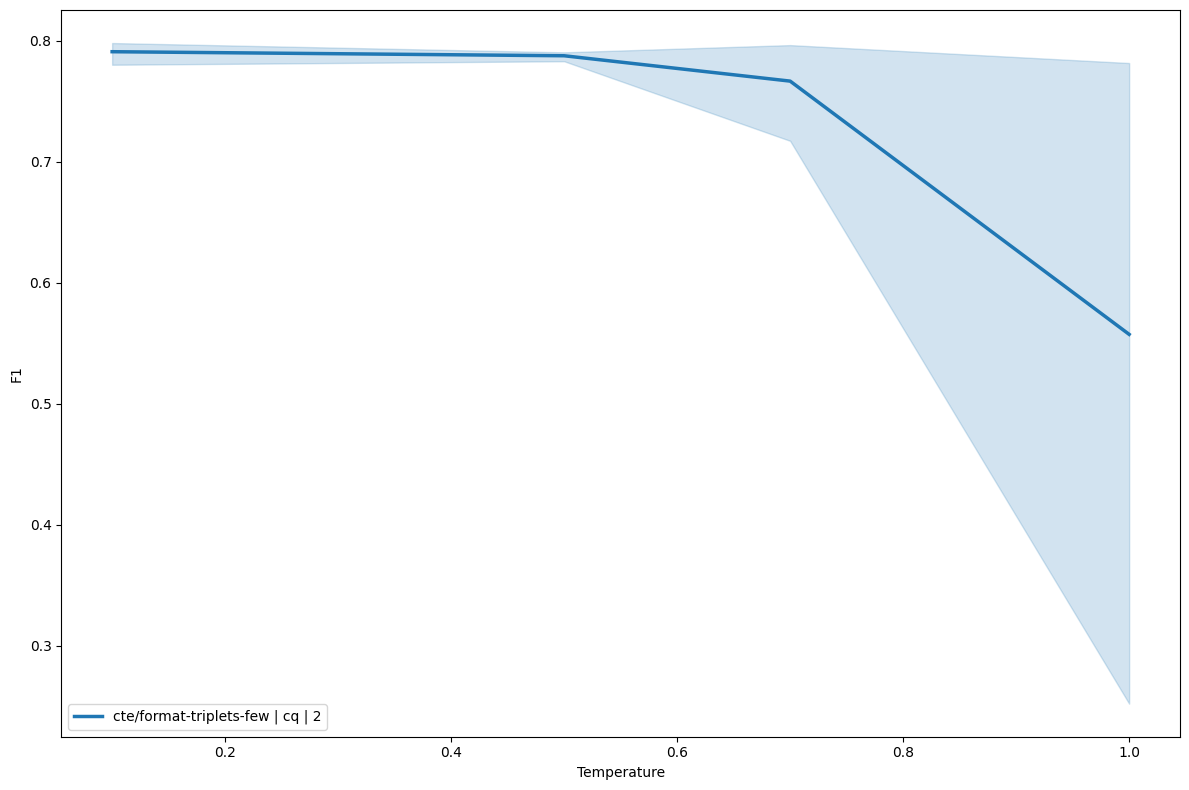

In [204]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], technique='CTE', figsize=(12, 8), legend_loc='lower left')

## Inspect

In [205]:
# # box-whisker plot
# plt.figure(figsize=(12, 8))
# sns.boxplot(
#     x="prompt",
#     y="f1",
#     data=prepared_df.sort_values(by="f1"),
# )
# plt.xticks(rotation=60, ha="right");

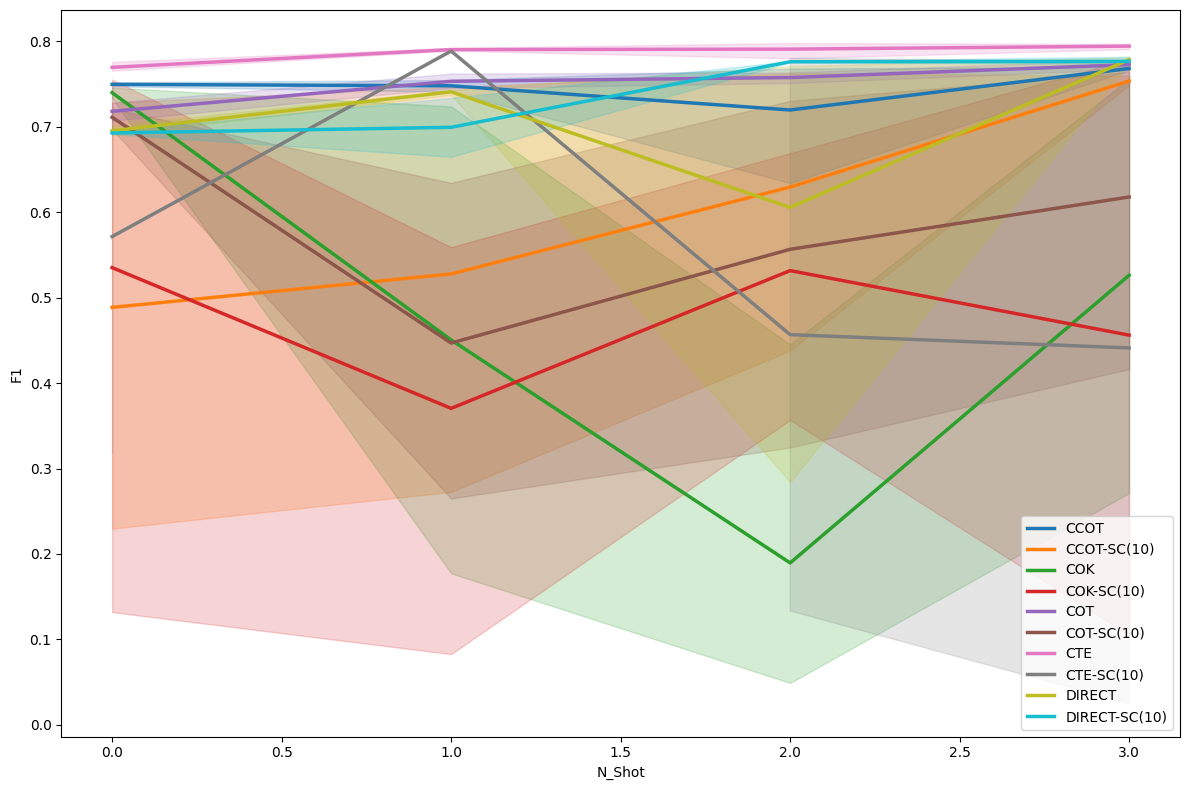

In [206]:
plot_variance(prepared_df[prepared_df['temperature'] == 0.1], x='n_shot', hue='technique', figsize=(12, 8), legend_loc='lower right')

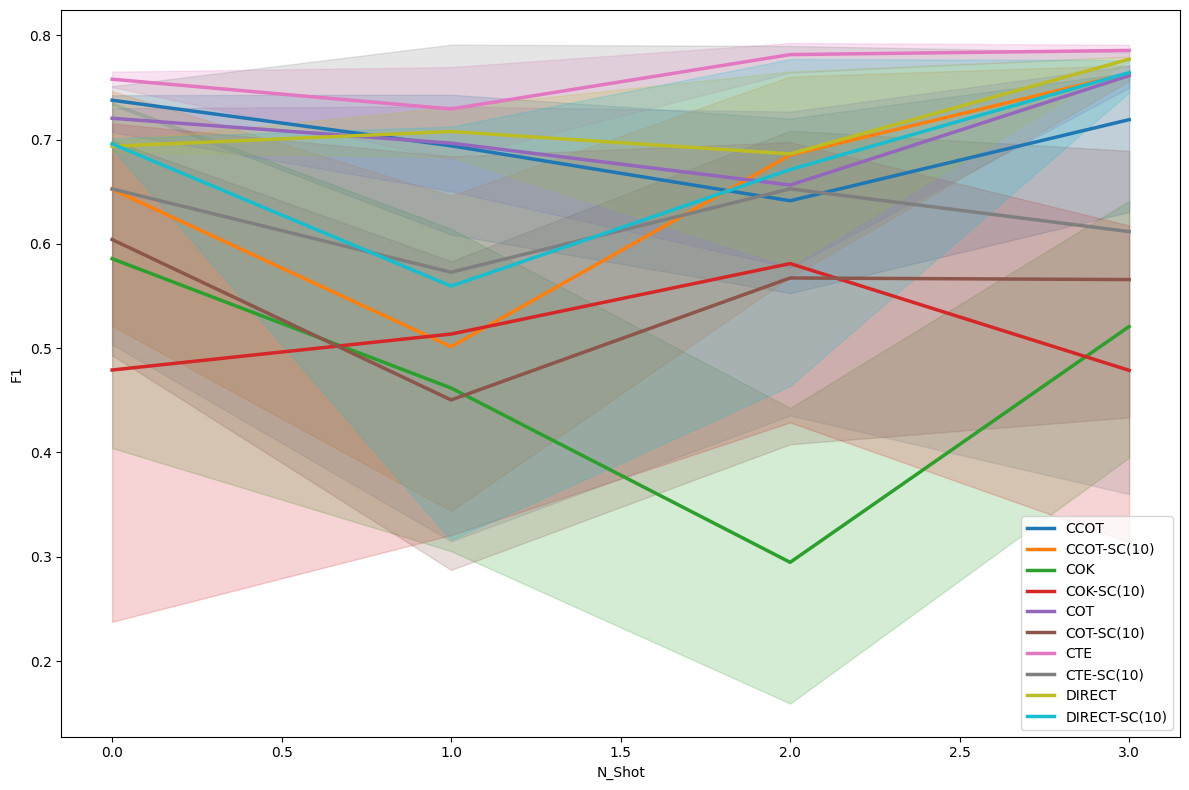

In [207]:
plot_variance(prepared_df[prepared_df['temperature'] < 1.0], x='n_shot', hue='technique', figsize=(12, 8), legend_loc='lower right')

In [208]:
df

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.run,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,metrics.3hops.exact_match,metrics.3hops.f1,metrics.4hops.exact_match,metrics.4hops.f1,params.qa.n_sc,params.qa.technique
0,minus-scab,0.1,ccot/format-thought,cq,semi/ccot,0,1,0.646667,0.745449,0.70,0.806764,0.60,0.694222,0.64,0.735360,1,CCOT
1,lippy-food,0.1,ccot/format-thought,cq,semi/ccot,0,2,0.653333,0.754578,0.71,0.820208,0.62,0.714222,0.63,0.729303,1,CCOT
2,snide-iglu,0.1,ccot/format-thought,cq,semi/ccot,0,3,0.656667,0.747483,0.71,0.813859,0.61,0.693722,0.65,0.734867,1,CCOT
3,lowse-tics,0.5,ccot/format-thought,cq,semi/ccot,0,1,0.643333,0.745538,0.70,0.809653,0.61,0.696294,0.62,0.730667,1,CCOT
4,lippy-lame,0.5,ccot/format-thought,cq,semi/ccot,0,2,0.623333,0.729068,0.71,0.815859,0.56,0.673103,0.60,0.698241,1,CCOT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,waugh-upas,0.1,direct/format-few,cq,semi/direct,3,3,0.673333,0.773961,0.72,0.829279,0.67,0.749421,0.63,0.743181,10,DIRECT-SC(10)
536,inert-linn,0.5,direct/format-few,cq,semi/direct,3,1,0.670000,0.754571,0.72,0.804786,0.68,0.730580,0.61,0.728347,10,DIRECT-SC(10)
537,ceric-crag,0.5,direct/format-few,cq,semi/direct,3,2,0.666667,0.766964,0.73,0.846060,0.66,0.732286,0.61,0.722547,10,DIRECT-SC(10)
538,picky-help,0.5,direct/format-few,cq,semi/direct,3,3,0.640000,0.717499,0.75,0.828034,0.59,0.642762,0.58,0.681701,10,DIRECT-SC(10)


In [209]:
mask = (df['params.run'] == 2) & (df['params.qa.temperature'] == 0.1)
df.loc[mask].sort_values('metrics.f1', ascending=False)

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.run,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,metrics.3hops.exact_match,metrics.3hops.f1,metrics.4hops.exact_match,metrics.4hops.f1,params.qa.n_sc,params.qa.technique
421,leafy-waft,0.1,cte/format-triplets-few,cq,semi/cte,2,2,0.716667,0.794464,0.80,0.863306,0.70,0.755846,0.65,0.764242,1,CTE
433,rathe-soft,0.1,cte/format-triplets-few,cq,semi/cte,3,2,0.696667,0.790737,0.75,0.840782,0.70,0.770006,0.64,0.761424,1,CTE
409,azure-arks,0.1,cte/format-triplets-few,cq,semi/cte,1,2,0.716667,0.789756,0.78,0.845960,0.72,0.777322,0.65,0.745984,1,CTE
184,boned-mime,0.1,cok/adapted,cq,semi/cok,3,2,0.696667,0.784877,0.77,0.843179,0.68,0.750709,0.64,0.760742,1,COK
369,leary-afro,0.1,cot/format-thought,cq,semi/cot,3,2,0.660000,0.777675,0.70,0.829096,0.64,0.752762,0.64,0.751168,10,COT-SC(10)
527,beady-pant,0.1,direct/format-few,cq,semi/direct,2,2,0.673333,0.776904,0.73,0.832452,0.66,0.750651,0.63,0.747608,10,DIRECT-SC(10)
112,valid-pyre,0.1,ccot/format-thought,cq,semi/ccot,2,2,0.686667,0.776749,0.72,0.800071,0.67,0.757603,0.67,0.772571,10,CCOT-SC(10)
287,freed-fils,0.1,cot/format-thought,cq,semi/cot,3,2,0.663333,0.775215,0.73,0.842024,0.63,0.737960,0.63,0.745662,1,COT
505,cross-coof,0.1,direct/format-few,cq,semi/direct,3,2,0.676667,0.774026,0.73,0.827643,0.66,0.742278,0.64,0.752156,1,DIRECT
534,socko-slew,0.1,direct/format-few,cq,semi/direct,3,2,0.680000,0.773862,0.73,0.844070,0.67,0.732755,0.64,0.744762,10,DIRECT-SC(10)
